In [1]:
%matplotlib inline
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
!dir

Chequered\ Black\ White500px-500x500.png
defish.ipynb
Fisheye_photo_corrected_no_zoom.jpg
Fisheye_photo_corrected_with_zoom.jpg
Fisheye_photo.jpg
R0010004.JPG
R0010005.JPG
R0010006.JPG
R0010007.JPG
R0010008.JPG
R0010009.JPG
R0010010.JPG
R0010013.JPG
stock-vector-chessboard-vector-background-1039437457.jpg


In [3]:
# From Ricoh
image = mpimg.imread('R0010005.JPG')
(y,x,c) = image.shape
image = image[:,int(x/4):int(3*x/4),:]
image1 = mpimg.imread('R0010006.JPG')
image1 = image1[:,int(x/4):int(3*x/4),:]
image2 = mpimg.imread('R0010007.JPG')
image2 = image2[:,int(x/4):int(3*x/4),:]

In [3]:
# From blog post
image = mpimg.imread('Fisheye_photo.jpg')
image_nz = mpimg.imread('Fisheye_photo_corrected_no_zoom.jpg')
image_z = mpimg.imread('Fisheye_photo_corrected_with_zoom.jpg')

In [25]:
# Algorithm implementation using both meanings of zoom
def correction(image,strength=1, zoom=1, zoom1=1):
    (height,width,chan) = image.shape
    halfWidth = width/2
    halfHeight = height/2
    #onebyk = 2*1.414/strength
    #mintheta = 0.5*onebyk
    newWidth = width #int(width/mintheta)
    newHeight = height #int(height/mintheta)
    newImage = np.zeros([newHeight,newWidth,3],dtype=np.uint8)
    print('destSize = ',newImage.shape)
    if strength == 0:
        strength = 0.00001
    corrRadius = np.sqrt(height*height + width*width)/strength
    for py in range(newHeight):
        for px in range(newWidth):
            pyd = zoom*(py - int(newHeight)/2)
            pxd = zoom*(px - int(newWidth)/2)
            mydist = np.sqrt(pyd*pyd + pxd*pxd)
            my_r = mydist/corrRadius
            if my_r==0:
                my_theta=1
            else:
                my_theta = np.arctan(my_r)/my_r
            sourceX = int(halfWidth + my_theta*pxd*zoom1)
            sourceY = int(halfHeight + my_theta*pyd*zoom1)   
            if sourceX < width and sourceY < height and sourceX >=0 and sourceY >=0:
                newImage[py,px,:] = image[sourceY,sourceX,:]        
    return newImage
        

In [44]:
# Two calls for A vs B comparison
newImage = correction(image,4.5,4) 
newImage1 = correction(image,5.2,4) 

destSize =  (2688, 2688, 3)
destSize =  (2688, 2688, 3)


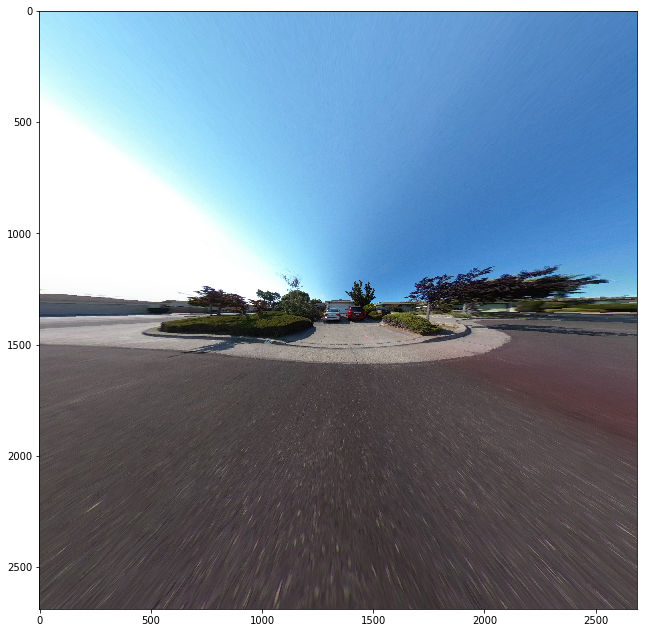

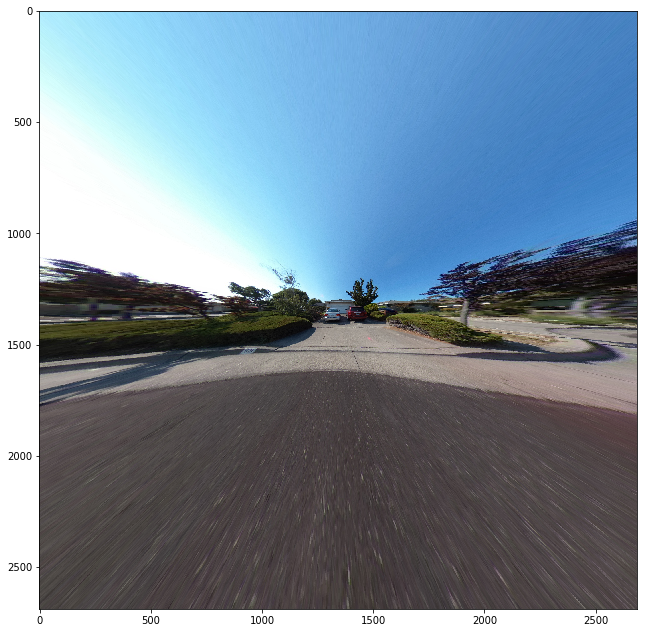

In [45]:
# Three plots, original, A and B
plt.figure(figsize = (11,11))
plt.imshow(image)
plt.figure(figsize = (11,11))
plt.imshow(newImage)
plt.figure(figsize = (11,11))
plt.imshow(newImage1)

# APPENDIX

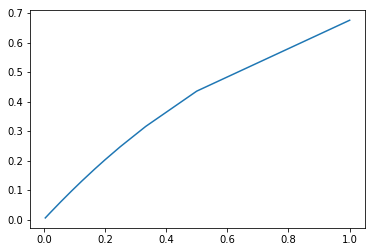

In [37]:
# Math plots
xnew = 1 #np.arange(0.000001,1,0.001)
k = np.arange(1,200,1)
ynew = 1 #np.arange(0.00001,1,0.001)
r = k*np.sqrt(xnew*xnew+ynew*ynew)
theta = np.arctan(r)/r
x = theta*xnew
plt.plot(1/k,theta)
    

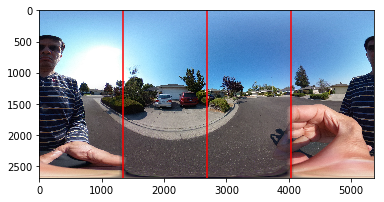

In [5]:
# Ricoh extraction
plt.figure
plt.imshow(image2)
plt.axvline(x/2,color='r')
plt.axvline(x/4,color='r')
plt.axvline(3*x/4,color='r')